In [44]:
# Importing needed packages:

import eurostat                                                   # version: 1.0.4
import numpy as np                                                # version: 1.24.3
import pandas as pd                                               # version: 2.0.3
import seaborn as sns                                             # version: 0.12.2
from scipy import stats                                           # version: 1.11.1
import matplotlib as mpl                                          # version: 3.7.2
import matplotlib.pyplot as plt                                   # version: 3.7.2
from IPython.display import display                               # version: 8.15.0

●	**Discuss in detail the process of acquiring your raw data, detailing the positive and/or negative aspects of your research and acquisition.<br> This should include the relevance and implications of any and all licensing/permissions associated with the data.** [0-15]<br>
### Answer

Undoubtedly, this was the most challenging part of the assignment. However, I discovered the `Eurostat` website, which provides extensive content on data transportation. Additionally, the `CSO` offers interesting datasets related to the Irish transportation sector. Other platforms utilized included `GitHub`, `Kaggle`, and `TripAdvisor`.

A positive aspect of this research is that I discovered platforms such as `Eurostat`, which even has a `Python` package to download its datasets. On the negative side, the length of transportation datasets I found was a challenge for the machine learning part. There was not enough data to create accurate and consistent models. However, I found a solution to overcome this issue.

In terms of licenses, we are mostly covered by `Creative Commons`, allowing us to use these datasets. Only for `TripAdvisor` `Ryanair` reviews, I do not have licenses. After thorough research, I believe I am not infringing any law, as I am not collecting any personal data. I am compliant with `GDPR`, and `TripAdvisor` does not state that you cannot collect their reviews for research purposes.


●	**Exploratory Data Analysis helps to identify patterns, inconsistencies, anomalies, missing data, and other attributes and issues in data sets so problems can be addressed.
Evaluate your raw data and detail, in depth, the various attributes and issues that you find.<br> Your evaluation should reference evidence to support your chosen methodology and use visualizations to illustrate your findings.** [0-25]<br>
### Answer

In [15]:
# Passenger Journeys by Luas
# Source: https://data.gov.ie/dataset/tii03-passenger-journeys-by-luas
# Unit: Weekly passenger number
# Licence: https://creativecommons.org/licenses/by/4.0/
# 3.1.1 Dataset for 3.2. Confidence interval

dvdf = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TII03/CSV/1.0/en')

Original dataset attributes:

In [16]:
dvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        780 non-null    object 
 1   Statistic Label  780 non-null    object 
 2   TLIST(W1)        780 non-null    object 
 3   Week             780 non-null    object 
 4   C03132V03784     780 non-null    object 
 5   Luas Line        780 non-null    object 
 6   UNIT             780 non-null    object 
 7   VALUE            771 non-null    float64
dtypes: float64(1), object(7)
memory usage: 48.9+ KB


We need to refine it to calculate `Confidence Intervals`; Exploratory Data Analysis (EDA) starts:

In [18]:
# Renaming columns
dvdf = dvdf.rename(columns={'Luas Line': 'Luas_Line'})

# Dropping 'STATISTIC','Statistic Label','TLIST(W1)','C03132V03784','UNIT' columns irrelevant our analysis:
dvdf_col_drop = ['STATISTIC','Statistic Label','TLIST(W1)','C03132V03784','UNIT']
dvdf.drop(dvdf_col_drop ,axis=1, inplace=True) 

In [19]:
dvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Week       780 non-null    object 
 1   Luas_Line  780 non-null    object 
 2   VALUE      771 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.4+ KB


In [20]:
dvdf.head()

,Week,Luas_Line,VALUE
0,2019 Week 01,All Luas lines,549533.0
1,2019 Week 01,Red line,274139.0
2,2019 Week 01,Green line,275394.0
3,2019 Week 02,All Luas lines,839022.0
4,2019 Week 02,Red line,408199.0


In [21]:
def luas_line_row_count(dataframe):
    return dataframe['Luas_Line'].value_counts()

dvdf_count = pd.DataFrame(dvdf)

# Calling the function
luas_line_counts = luas_line_row_count(dvdf_count)

luas_line_counts

Luas_Line
All Luas lines    260
Red line          260
Green line        260
Name: count, dtype: int64

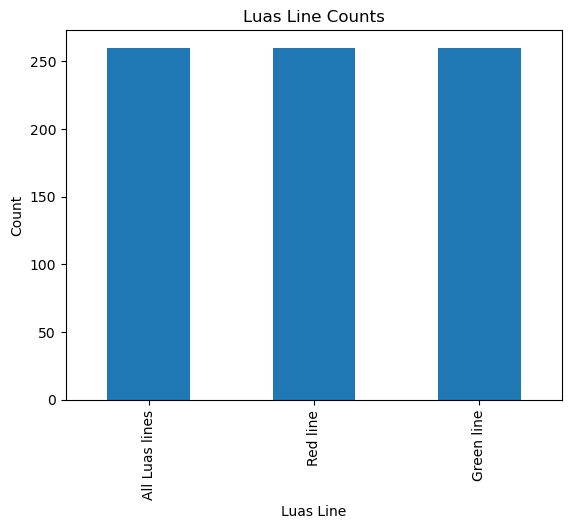

In [23]:
# Convert the data to a pandas Series for easier plotting
series_data = pd.Series(luas_line_counts)

# Plotting

series_data.plot(kind='bar')
plt.title('Luas Line Counts')
plt.xlabel('Luas Line')
plt.ylabel('Count')
plt.show()

An important step is to drop *All Luas lines* so that we can focus specifically on the Red and Green lines

In [24]:
# Creating dataset dvdfa dropping values for 'All Luas lines' we want to focus on 'Red line' and 'Green line'
dvdfa = dvdf[(dvdf['Luas_Line'] != 'All Luas lines')]

In [25]:
def luas_line_row_count(dataframe):
    return dataframe['Luas_Line'].value_counts()

dvdfa_count = pd.DataFrame(dvdfa)

# Calling the function
luas_line_counts = luas_line_row_count(dvdfa_count)

luas_line_counts

Luas_Line
Red line      260
Green line    260
Name: count, dtype: int64

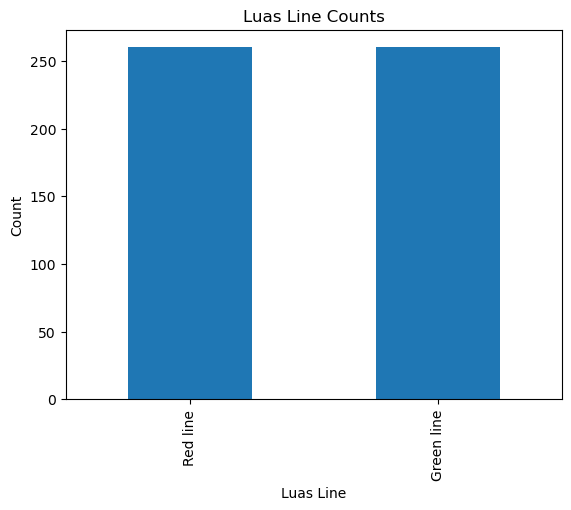

In [26]:
# Convert the data to a pandas Series for easier plotting
series_data = pd.Series(luas_line_counts)

# Plotting

series_data.plot(kind='bar')
plt.title('Luas Line Counts')
plt.xlabel('Luas Line')
plt.ylabel('Count')
plt.show()

In [28]:
# Display the rows with null values
dvdfa_NaN = dvdfa[dvdfa.isnull().any(axis=1)].reset_index(drop=True)
print("Rows with null values:")
dvdfa_NaN

Rows with null values:


,Week,Luas_Line,VALUE
0,2019 Week 53,Red line,NaN
1,2019 Week 53,Green line,NaN
2,2021 Week 53,Red line,NaN
3,2021 Week 53,Green line,NaN
4,2022 Week 53,Red line,NaN
5,2022 Week 53,Green line,NaN


In [29]:
# Dropping NaN
dvdfa = dvdfa.dropna(subset=['VALUE'])

# Dropping '2020 Week 53' to ensure consistent week counts across all years:
dvdfa = dvdfa[~dvdfa['Week'].str.contains('Week 53')]

In [30]:
dvdfa.head()

,Week,Luas_Line,VALUE
1,2019 Week 01,Red line,274139.0
2,2019 Week 01,Green line,275394.0
4,2019 Week 02,Red line,408199.0
5,2019 Week 02,Green line,430823.0
7,2019 Week 03,Red line,376785.0


In [31]:
# Extracting the year from Week column
dvdfa['Year'] = pd.to_datetime(dvdfa['Week'].str[:4] + ' ' + dvdfa['Week'].str[-2:] + ' 1', format='%Y %W %w').dt.year

In [32]:
# Counting the values that each year has:
year_counts = dvdfa['Year'].value_counts().sort_index()
year_counts

Year
2019    104
2020    104
2021    104
2022    104
2023     96
Name: count, dtype: int64

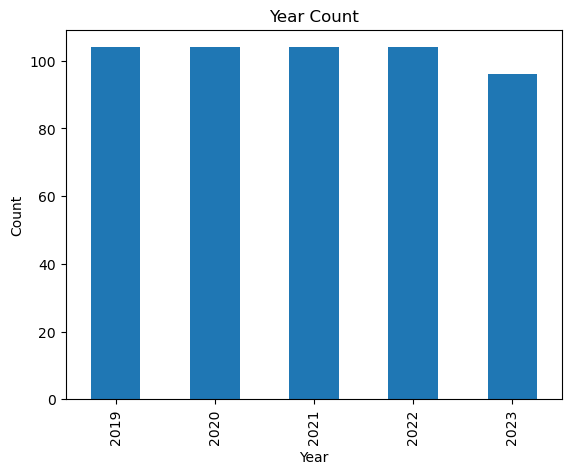

In [33]:
# Convert the data to a pandas Series for easier plotting
series_data = pd.Series(year_counts)

# Plotting

series_data.plot(kind='bar')
plt.title('Year Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

We won't be using 2023 for CI as it doesn't have the same count as the rest of the years:

In [34]:
# Creating variables for each year and storing the values to perform Confidence Intervals:

dvdfa_2019 = dvdfa[(dvdfa['Year'] == 2019)].copy()
dvdfa_2019.reset_index(drop=True, inplace=True)
dvdfa_2020 = dvdfa[(dvdfa['Year'] == 2020)].copy()
dvdfa_2020.reset_index(drop=True, inplace=True)
dvdfa_2021 = dvdfa[(dvdfa['Year'] == 2021)].copy()
dvdfa_2021.reset_index(drop=True, inplace=True)
dvdfa_2022 = dvdfa[(dvdfa['Year'] == 2022)].copy()
dvdfa_2022.reset_index(drop=True, inplace=True)

We need to find out the averages for each of the years to perform *Confidence Intervals* and *Hypothesis test*:

In [35]:
# Passing descriptive statistics for each year into variables
de_2019 = dvdfa_2019.describe().drop('Year', axis=1)
de_2020 = dvdfa_2020.describe().drop('Year', axis=1)
de_2021 = dvdfa_2021.describe().drop('Year', axis=1)
de_2022 = dvdfa_2022.describe().drop('Year', axis=1)

# Concatenating datasets side by side to have it visually handy
combined_desc = pd.concat([de_2019, de_2020, de_2021, de_2022], axis=1, keys=['2019', '2020', '2021', '2022'])

print('Descriptive Statistics:')
display(combined_desc)

Descriptive Statistics:


,2019,2020,2021,2022
,VALUE,VALUE,VALUE,VALUE
count,104.000000,104.000000,104.000000,104.000000
mean,462966.403846,185157.009615,187611.134615,373602.250000
std,58751.214682,139494.873679,82667.596263,90580.590311
min,259211.000000,19727.000000,64278.000000,161546.000000
25%,441097.250000,92848.000000,102652.500000,306127.500000
50%,464353.000000,152092.000000,195341.500000,354642.000000
75%,499103.250000,203166.000000,258089.000000,442544.750000
max,622699.000000,482333.000000,327777.000000,547010.000000


From the original dataframe `dvdf`, we have obtained four datasets: `dvdfa_2019`, `dvdfa_2020`, `dvdfa_2021`, and `dvdfa_2022`, to perform Confidence Intervals.

In [85]:
# Modal split of inland passenger transport
# Unit of measure (% based on passenger-kilometres) : one passenger-km is one passenger transported over one kilometre
# https://ec.europa.eu/eurostat/databrowser/view/TRAN_HV_PSMOD__custom_2638259/bookmark/table?lang=en&bookmarkId=2d735f97-a7d6-4b24-bc27-a6c8e21db6a7
# Legal notice: https://commission.europa.eu/legal-notice_en
# Licence: Creative Commons Attribution 4.0 International (CC BY 4.0) licence

dvdf1 = eurostat.get_data_df('TRAN_HV_PSMOD',True)
dvdf1.head()

,freq,unit,vehicle,geo\TIME_PERIOD,1990_value,1990_flag,1991_value,1991_flag,1992_value,1992_flag,...,2017_value,2017_flag,2018_value,2018_flag,2019_value,2019_flag,2020_value,2020_flag,2021_value,2021_flag
0,A,PC,BUS_TOT,AT,11.0,,10.6,,10.5,,...,10.0,,9.5,be,9.7,e,9.3,e,9.0,e
1,A,PC,BUS_TOT,BE,10.6,e,10.7,e,10.7,e,...,10.2,e,10.3,e,10.4,e,8.2,e,8.2,e
2,A,PC,BUS_TOT,BG,NaN,:,NaN,:,NaN,:,...,13.1,e,12.0,e,13.0,e,8.6,e,8.0,e
3,A,PC,BUS_TOT,CH,3.7,,3.9,,4.0,,...,5.9,e,5.9,e,6.1,e,5.8,e,5.9,e
4,A,PC,BUS_TOT,CY,NaN,:,NaN,:,NaN,:,...,19.0,e,18.9,e,18.5,e,12.6,e,12.7,e


Original dataset attributes:

In [69]:
dvdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             148 non-null    object 
 1   unit             148 non-null    object 
 2   vehicle          148 non-null    object 
 3   geo\TIME_PERIOD  148 non-null    object 
 4   1990_value       84 non-null     float64
 5   1990_flag        148 non-null    object 
 6   1991_value       80 non-null     float64
 7   1991_flag        148 non-null    object 
 8   1992_value       84 non-null     float64
 9   1992_flag        148 non-null    object 
 10  1993_value       92 non-null     float64
 11  1993_flag        148 non-null    object 
 12  1994_value       88 non-null     float64
 13  1994_flag        148 non-null    object 
 14  1995_value       117 non-null    float64
 15  1995_flag        148 non-null    object 
 16  1996_value       117 non-null    float64
 17  1996_flag       

In [70]:
dvdf1_before = dvdf1.copy()

We need to refine it to calculate `Hypothesis Test Two Populations`; Exploratory Data Analysis (EDA) starts:

In [71]:
# Tyding up sfd1

# Filter columns that do not contain '_flag'
dvdf1 = dvdf1.filter(regex='^(?!.*_flag)')

# Renaming columns
dvdf1 = dvdf1.rename(columns={'geo\\TIME_PERIOD': 'Country_code','vehicle':'Vehicle_type'})

# Dropping not needed rows:
# From column 'Vehicle_type' we don't need 'TRN_BUS_TOT_AVD'
# From column 'Country_code' we don't need 'EU27_2020' and 'EU28'
dvdf1 = dvdf1[(dvdf1['Vehicle_type'] != 'TRN_BUS_TOT_AVD') & ~dvdf1['Country_code'].isin(['EU27_2020', 'EU28'])]

# Drop rows with null values
dvdf1 = dvdf1.dropna()

# Dropping columns 'freq' and 'unit' we don't need them. Unit of measurement for this dataset is percentage
dvdf1 = dvdf1.drop(['freq', 'unit'], axis=1).reset_index(drop=True)

# Trimming 'BUS_TOT' to have just 'BUS'
dvdf1['Vehicle_type'] = dvdf1['Vehicle_type'].str.replace('_TOT', '')

# Concatenate 'Country_code' and 'Vehicle_type'
dvdf1['Country_Vehicle'] = dvdf1['Country_code'] + '_' + dvdf1['Vehicle_type']

# Drop the original columns
dvdf1 = dvdf1.drop(['Vehicle_type', 'Country_code'], axis=1)

dvdf1.head()

,1990_value,1991_value,1992_value,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,...,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,Country_Vehicle
0,11.0,10.6,10.5,10.7,10.6,10.9,10.7,10.9,10.9,10.7,...,9.9,9.9,9.9,9.9,10.0,9.5,9.7,9.3,9.0,AT_BUS
1,10.6,10.7,10.7,10.9,11.8,11.3,11.3,11.1,11.0,10.9,...,15.2,11.5,11.0,10.5,10.2,10.3,10.4,8.2,8.2,BE_BUS
2,3.7,3.9,4.0,3.9,4.0,3.8,3.6,3.6,5.3,5.2,...,5.7,5.8,5.9,5.9,5.9,5.9,6.1,5.8,5.9,CH_BUS
3,9.1,8.5,8.3,8.1,7.3,7.2,7.1,7.1,7.0,6.9,...,7.2,7.2,7.4,7.3,7.3,7.2,7.4,4.8,4.8,DE_BUS
4,11.3,11.1,15.2,15.3,15.5,16.6,17.4,16.9,14.1,13.9,...,9.8,9.8,9.8,9.8,10.0,9.6,9.2,6.8,7.1,DK_BUS


In [72]:
dvdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1990_value       54 non-null     float64
 1   1991_value       54 non-null     float64
 2   1992_value       54 non-null     float64
 3   1993_value       54 non-null     float64
 4   1994_value       54 non-null     float64
 5   1995_value       54 non-null     float64
 6   1996_value       54 non-null     float64
 7   1997_value       54 non-null     float64
 8   1998_value       54 non-null     float64
 9   1999_value       54 non-null     float64
 10  2000_value       54 non-null     float64
 11  2001_value       54 non-null     float64
 12  2002_value       54 non-null     float64
 13  2003_value       54 non-null     float64
 14  2004_value       54 non-null     float64
 15  2005_value       54 non-null     float64
 16  2006_value       54 non-null     float64
 17  2007_value       5

In [73]:
dvdf1_after = dvdf1.copy()

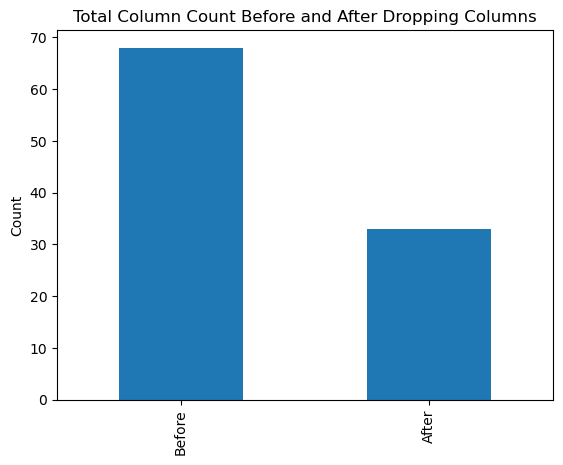

In [74]:
# Get column counts
count_before = dvdf1_before.shape[1]
count_after = dvdf1_after.shape[1]

# Convert the data to a pandas Series for easier plotting
column_counts = pd.Series([count_before, count_after], index=['Before', 'After'])

column_counts.plot(kind='bar')
plt.title('Total Column Count Before and After Dropping Columns')

plt.ylabel('Count')
plt.show()

The first issue is that we need to extract `years` and create a column to store them, the same goes for `Country_Vehicle`.<br> This marks the initial step in modeling the `Hypothesis Test for Two Populations`.

In [75]:
# We need to organise dvdf1, basically I want to have 'Year', 'Country_Vehicle' and 'value'
    
# Empty list to store results, initialising it
final_list = []

# Iterating over columns to extract the year from columns
for col in dvdf1.columns:
    if col.endswith('_value'):
        # Extracting each year from the columns
        year = col.split('_')[0]

        # Getting 'Vehicle_Country' for each row to get its corresponding values
        for index, row in dvdf1.iterrows():
            value = row[col]
            country_vehicle = row['Country_Vehicle']
            category = col.split('_')[1]  # Extract the category from the column name

            # Appending the final list as a dictionary
            final_list.append({
                'Year': year,
                'Country_Vehicle': country_vehicle,
                'Category': category,
                'Value': value
            })
            
# Converting 'final_list' to a DataFrame
Y_CV_V_df = pd.DataFrame(final_list)

# Pivot the DataFrame
Y_CV_V_df = Y_CV_V_df.pivot_table(index=['Year', 'Country_Vehicle'], columns='Category', values='Value').reset_index()
Y_CV_V_df = Y_CV_V_df.rename_axis(None, axis=1) # Index with no name as it should be
   
dvdf1 = Y_CV_V_df.copy() #Reusing variable dvdf1

dvdf1.head()

,Year,Country_Vehicle,value
0,1990,AT_BUS,11.0
1,1990,AT_CAR,77.1
2,1990,AT_TRN,11.9
3,1990,BE_BUS,10.6
4,1990,BE_CAR,83.3


Now, we need to pivot `dvdf1` to store each `Country_Vehicle` in a separate column. Once we have done that, the dataset will be ready for implementing the `Hypothesis Test for Two Populations`.

In [76]:
# Pivot the DataFrame
dvdf1 = dvdf1.pivot(index='Year', columns='Country_Vehicle', values='value').reset_index()
dvdf1 = dvdf1.rename_axis(None, axis=1)
dvdf1.head()

,Year,AT_BUS,AT_CAR,AT_TRN,BE_BUS,BE_CAR,BE_TRN,CH_BUS,CH_CAR,CH_TRN,...,PL_TRN,PT_BUS,PT_CAR,PT_TRN,SE_BUS,SE_CAR,SE_TRN,SI_BUS,SI_CAR,SI_TRN
0,1990,11.0,77.1,11.9,10.6,83.3,6.1,3.7,82.1,14.2,...,30.5,18.4,71.5,10.1,9.5,84.1,6.5,30.6,62.7,6.7
1,1991,10.6,77.0,12.4,10.7,83.3,6.1,3.9,81.1,15.0,...,24.6,18.6,71.4,9.9,9.5,84.7,5.9,29.3,66.4,4.3
2,1992,10.5,77.0,12.5,10.7,83.3,6.0,4.0,81.4,14.6,...,20.3,22.7,68.2,9.0,9.4,84.8,5.8,23.0,73.9,3.0
3,1993,10.7,77.2,12.1,10.9,83.3,5.9,3.9,80.9,15.2,...,17.7,19.3,72.2,8.5,9.3,84.4,6.3,21.1,75.8,3.1
4,1994,10.6,77.8,11.6,11.8,82.6,5.6,4.0,79.8,16.2,...,15.6,17.9,74.3,7.8,9.3,84.4,6.3,20.4,76.6,3.0


Getting statistics helps us establish the hypotheses:

In [77]:
# dvdf1.describe(include='all').T # Transposing columns to see each Country_Vehicle
# passing the stats into 'dvdf1b' dataframe
dvdf1b = (dvdf1.describe(include='all').T).reset_index().rename_axis(None, axis=1).copy()

# Dropping first row we don't need Years we already now that year range goes from 1990 to 2021
dvdf1b = dvdf1b.drop(0)

# Renaming columns
dvdf1b = dvdf1b.rename(columns={'index': 'Country_Vehicle'})
dvdf1b.head(10)

,Country_Vehicle,count,unique,top,freq,mean,std,min,25%,50%,75%,max
1,AT_BUS,32.0,NaN,NaN,NaN,10.275,0.633984,9.0,9.9,10.5,10.9,11.0
2,AT_CAR,32.0,NaN,NaN,NaN,78.6125,1.251,76.4,77.7,78.9,79.525,81.5
3,AT_TRN,32.0,NaN,NaN,NaN,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
4,BE_BUS,32.0,NaN,NaN,NaN,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
5,BE_CAR,32.0,NaN,NaN,NaN,81.7,1.835844,77.8,80.425,81.9,83.025,85.6
6,BE_TRN,32.0,NaN,NaN,NaN,6.7125,0.737804,5.6,6.075,6.55,7.325,8.2
7,CH_BUS,32.0,NaN,NaN,NaN,5.09375,0.808398,3.6,4.825,5.2,5.725,6.1
8,CH_CAR,32.0,NaN,NaN,NaN,78.528125,2.883796,73.9,75.0,79.55,81.025,82.5
9,CH_TRN,32.0,NaN,NaN,NaN,16.38125,2.303355,13.6,14.275,15.75,19.225,20.0
10,DE_BUS,32.0,NaN,NaN,NaN,7.0,0.864348,4.8,6.7,7.1,7.3,9.1


In [78]:
# Filtering by each Vehicle, it will help visually to have each category grouped
dvdf1_bus = dvdf1b[dvdf1b['Country_Vehicle'].str.contains('BUS')].drop(['unique', 'top','freq'], axis=1).sort_values(by='mean', ascending=False).reset_index(drop=True)
dvdf1_car = dvdf1b[dvdf1b['Country_Vehicle'].str.contains('CAR')].drop(['unique', 'top','freq'], axis=1).sort_values(by='mean', ascending=False).reset_index(drop=True)
dvdf1_trn = dvdf1b[dvdf1b['Country_Vehicle'].str.contains('TRN')].drop(['unique', 'top','freq'], axis=1).sort_values(by='mean', ascending=False).reset_index(drop=True)

In [79]:
print('Descriptive Statistics for BUS, category:')
display(dvdf1_bus)
print('Descriptive Statistics for CAR, category:')
display(dvdf1_car)
print('Descriptive Statistics for TRAIN, category:')
display(dvdf1_trn)

Descriptive Statistics for BUS, category:


,Country_Vehicle,count,mean,std,min,25%,50%,75%,max
0,HU_BUS,32.0,22.20625,2.564011,14.3,21.25,22.8,24.025,25.0
1,EL_BUS,32.0,22.078125,6.268649,12.3,17.45,19.6,28.125,32.4
2,PL_BUS,32.0,16.634375,5.64553,7.5,13.075,15.45,19.525,28.2
3,SI_BUS,32.0,14.621875,5.50148,7.5,11.4,11.8,17.075,30.6
4,IE_BUS,32.0,14.034375,1.144583,11.5,13.3,14.25,14.75,16.2
5,ES_BUS,32.0,12.75625,3.435952,6.4,11.875,13.0,13.55,23.3
6,IT_BUS,32.0,12.003125,0.936873,10.2,11.4,11.7,12.475,14.7
7,DK_BUS,32.0,11.740625,2.805623,6.8,9.8,10.8,14.0,17.4
8,BE_BUS,32.0,11.603125,1.586126,8.2,10.7,11.2,12.85,15.2
9,FI_BUS,32.0,11.03125,1.430416,8.3,9.9,10.5,12.225,13.5


Descriptive Statistics for CAR, category:


,Country_Vehicle,count,mean,std,min,25%,50%,75%,max
0,NL_CAR,32.0,86.121875,1.487959,82.9,85.4,86.0,87.225,90.1
1,FR_CAR,32.0,85.378125,1.13101,83.3,84.575,85.5,86.4,87.0
2,DE_CAR,32.0,85.346875,1.169501,83.3,84.5,85.4,85.8,88.8
3,LU_CAR,32.0,84.575,1.151717,82.6,83.4,84.95,85.325,86.6
4,PT_CAR,32.0,84.515625,7.135785,68.2,80.0,89.15,89.7,93.0
5,FI_CAR,32.0,83.878125,1.59105,81.2,82.375,84.2,84.9,87.7
6,SE_CAR,32.0,83.496875,1.338387,79.5,83.4,83.9,84.1,84.8
7,IE_CAR,32.0,82.85,1.287157,80.5,82.1,82.7,83.4,86.1
8,SI_CAR,32.0,82.71875,6.284258,62.7,80.4,85.6,86.425,91.2
9,IT_CAR,32.0,82.15625,1.290396,78.9,81.575,82.35,83.0,85.9


Descriptive Statistics for TRAIN, category:


,Country_Vehicle,count,mean,std,min,25%,50%,75%,max
0,CH_TRN,32.0,16.38125,2.303355,13.6,14.275,15.75,19.225,20.0
1,HU_TRN,32.0,11.171875,2.125609,6.0,10.0,11.85,12.9,14.7
2,AT_TRN,32.0,11.11875,1.289771,9.2,9.8,11.35,12.1,13.9
3,PL_TRN,32.0,10.428125,5.815177,4.9,6.9,8.35,11.0,30.5
4,NL_TRN,32.0,9.39375,1.306297,6.9,8.4,9.35,10.45,11.8
5,FR_TRN,32.0,9.028125,0.821578,7.5,8.35,9.1,9.8,10.3
6,DK_TRN,32.0,8.365625,1.257906,5.8,7.95,8.4,9.3,10.3
7,SE_TRN,32.0,8.203125,1.663747,5.8,6.775,7.75,9.25,12.2
8,DE_TRN,32.0,7.659375,0.808766,5.4,7.275,7.6,8.225,9.3
9,BE_TRN,32.0,6.7125,0.737804,5.6,6.075,6.55,7.325,8.2


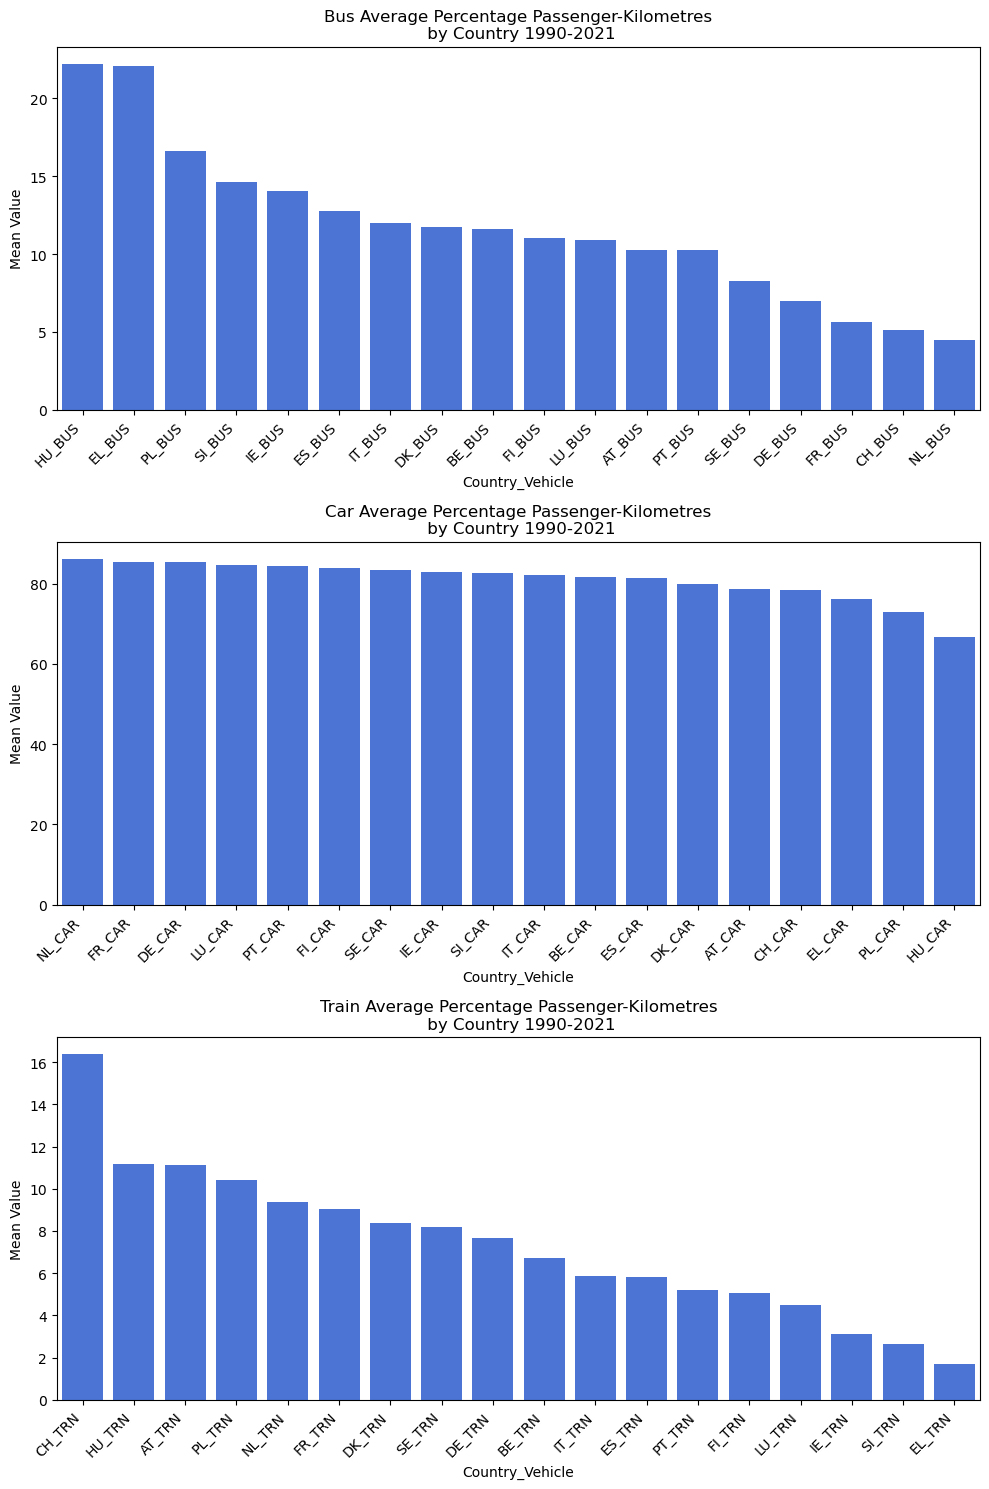

In [100]:
# Plots for Bus, Car, and Train 
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for Bus
sns.barplot(x='Country_Vehicle', y='mean', data=dvdf1_bus, color='#346beb', errorbar=None, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('Country_Vehicle')
axes[0].set_ylabel('Mean Value')
axes[0].set_title('Bus Average Percentage Passenger-Kilometres\n by Country 1990-2021')

# Plot for Car
sns.barplot(x='Country_Vehicle', y='mean', data=dvdf1_car, color='#346beb', errorbar=None, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('Country_Vehicle')
axes[1].set_ylabel('Mean Value')
axes[1].set_title('Car Average Percentage Passenger-Kilometres\n by Country 1990-2021')

# Plot for Train
sns.barplot(x='Country_Vehicle', y='mean', data=dvdf1_trn, color='#346beb', errorbar=None, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].set_xlabel('Country_Vehicle')
axes[2].set_ylabel('Mean Value')
axes[2].set_title('Train Average Percentage Passenger-Kilometres\n by Country 1990-2021')

plt.tight_layout()
plt.show()

Now we can apply the `Hypothesis Test for Two Populations` to compare `Ireland` with other `EU` countries.

In [86]:
# Air passenger transport by main airports in each reporting country
# Unit of measure: Annual passengers carried
# https://ec.europa.eu/eurostat/databrowser/view/AVIA_PAOA__custom_2638371/bookmark/table?lang=en&bookmarkId=9ff9f1d8-f4e7-4579-9454-806c644e90a1
# Legal notice: https://commission.europa.eu/legal-notice_en
# Licence: Creative Commons Attribution 4.0 International (CC BY 4.0) licence

dvdf2 = eurostat.get_data_df('AVIA_PAOA',True) #It takes a bit to load...                                                             
dvdf2.head()

,freq,unit,tra_meas,rep_airp,schedule,tra_cov\TIME_PERIOD,1993_value,1993_flag,1993-01_value,1993-01_flag,...,2023-10_value,2023-10_flag,2023-11_value,2023-11_flag,2023-Q1_value,2023-Q1_flag,2023-Q2_value,2023-Q2_flag,2023-Q3_value,2023-Q3_flag
0,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL,1956.0,,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
1,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_IEU27_2020,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
2,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_IEU28,1525.0,,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
3,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_XEU27_2020,NaN,:,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:
4,A,FLIGHT,CAF_PAS,AT_LOWG,N_SCHED,INTL_XEU28,431.0,,NaN,:,...,NaN,:,NaN,:,NaN,:,NaN,:,NaN,:


In [87]:
# Creating a backup as it takes ages to load....
dvdf2_backup = dvdf2.copy() 

In [90]:
# Column count before tidying the dataset:
dvdf2_before = dvdf2.copy() 

Original dataset attributes:

In [88]:
dvdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277206 entries, 0 to 277205
Columns: 1054 entries, freq to 2023-Q3_flag
dtypes: float64(524), object(530)
memory usage: 2.2+ GB


Way to many columns, we need to refine it to calculate `Anova one-way`; Exploratory Data Analysis (EDA) starts:

In [89]:
# Tyding up dvdf2
# Filter columns that do not contain '_flag'
dvdf2 = dvdf2.filter(regex='^(?!.*_flag)')
dvdf2.head()

# We need to get annual passengers carried
# Filtering based on criteria from:
# https://ec.europa.eu/eurostat/databrowser/view/AVIA_PAOA__custom_2638371/bookmark/table?lang=en&bookmarkId=9ff9f1d8-f4e7-4579-9454-806c644e90a1
dvdf2 = dvdf2[(dvdf2['freq'] == 'A') & (dvdf2['tra_meas'] == 'PAS_BRD') &
            (dvdf2['schedule'] == 'TOT')  & (dvdf2['tra_cov\\TIME_PERIOD'] == 'TOTAL')]

# Kepping following columns
Col_no_drop = ['freq', 'unit', 'tra_meas', 'rep_airp', 'schedule', 'tra_cov\\TIME_PERIOD']
pattern = r'\d{4}_value'  # Matching 'YYYY_value' pattern

# Use a regular expression to filter columns
Col_filter = dvdf2.columns[dvdf2.columns.str.match(pattern)]  # Columns matching the pattern

# Combine additional columns with the filtered ones
Col_total = Col_no_drop + list(Col_filter)

# Filtering dvdf2 wiht desired columns
dvdf2 = dvdf2[Col_total]

#Dropping not needed columns:

dvdf2 = dvdf2.drop(['freq', 'unit','tra_meas','schedule','tra_cov\\TIME_PERIOD'], axis=1).reset_index(drop=True)

# Renaming columns
dvdf2 = dvdf2.rename(columns={'rep_airp': 'Country_Icao'})

dvdf2.head()

,Country_Icao,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,...,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
0,AT_LOWG,393440.0,446219.0,496184.0,520286.0,593361.0,620805.0,645253.0,723932.0,722471.0,...,894785.0,911708.0,977732.0,990208.0,970037.0,1042519.0,1049248.0,201132.0,229492.0,568833.0
1,AT_LOWI,398493.0,421759.0,440038.0,472134.0,517649.0,585377.0,599678.0,667226.0,655949.0,...,991550.0,1004755.0,1011221.0,1013641.0,1095192.0,1125223.0,1151272.0,490108.0,126743.0,726695.0
2,AT_LOWK,199137.0,203699.0,200213.0,196849.0,218650.0,222716.0,212299.0,229157.0,224194.0,...,263835.0,227850.0,230338.0,196036.0,216784.0,229755.0,211153.0,49736.0,29722.0,83714.0
3,AT_LOWL,321129.0,390317.0,489119.0,573104.0,627838.0,640404.0,653807.0,707640.0,678682.0,...,560092.0,575012.0,541287.0,443273.0,413950.0,475124.0,445423.0,52755.0,70454.0,214199.0
4,AT_LOWS,970732.0,950530.0,1042219.0,1037924.0,1083428.0,1118521.0,1117161.0,1193228.0,1226085.0,...,1676525.0,1838545.0,1852219.0,1753698.0,1900799.0,1861010.0,1731428.0,675204.0,303746.0,1244528.0


In [91]:
# Column count after tidying the dataset:
dvdf2_after = dvdf2.copy() 

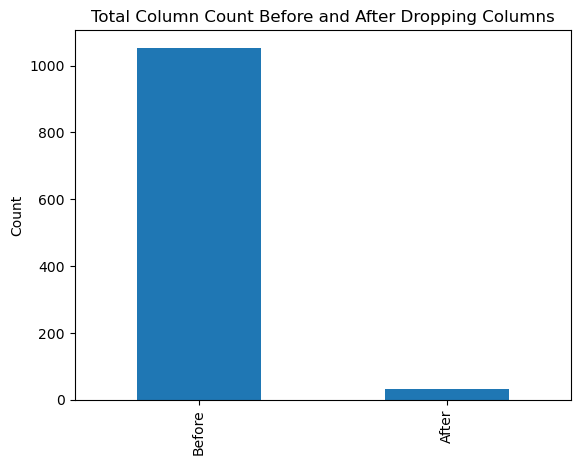

In [92]:
# Get column counts
count_before = dvdf2_before.shape[1]
count_after = dvdf2_after.shape[1]

# Convert the data to a pandas Series for easier plotting
column_counts = pd.Series([count_before, count_after], index=['Before', 'After'])

column_counts.plot(kind='bar')
plt.title('Total Column Count Before and After Dropping Columns')

plt.ylabel('Count')
plt.show()

In [101]:
# Importing icao codes to bring in airport names
# source: https://github.com/ip2location/ip2location-iata-icao/blob/master/iata-icao.csv
# Licence: https://creativecommons.org/licenses/by-sa/4.0/

dvdf2a = pd.read_csv('iata-icao.csv')

dvdf2a.head()

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Ash Shariqah,SHJ,OMSJ,Sharjah International Airport,25.3286,55.5172
1,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
2,AE,Al Fujayrah,FJR,OMFJ,Fujairah International Airport,25.1122,56.3240
3,AE,Abu Zaby,XSB,OMBY,Sir Bani Yas Airport,24.2836,52.5803
4,AE,Ra's al Khaymah,RKT,OMRK,Ras Al Khaimah International Airport,25.6135,55.9388


In [102]:
# Create a new column by concatenating 'country_code' and 'Airport_Icao'
dvdf2a['Country_Icao'] = dvdf2a['country_code'] + '_' + dvdf2a['icao']

# Renaming columns
dvdf2a = dvdf2a.rename(columns={'airport': 'Airport_Name'})

# Bringing in Airport Name to dvdf2
dvdf2 = pd.merge(dvdf2, dvdf2a[['Country_Icao', 'Airport_Name']], on='Country_Icao', how='inner')

# Move the 'Airport_Icao' column to the second position
dvdf2.insert(1, 'Airport_Name', dvdf2.pop('Airport_Name'))

# As Ireland is our baseline let's filter and see which airports we have
ireland_airports = dvdf2[dvdf2['Country_Icao'].str.startswith('IE_')].reset_index(drop=True)
pd.set_option('display.max_columns', None)
ireland_airports

,Country_Icao,Airport_Name,1993_value,1994_value,1995_value,1996_value,1997_value,1998_value,1999_value,2000_value,2001_value,2002_value,2003_value,2004_value,2005_value,2006_value,2007_value,2008_value,2009_value,2010_value,2011_value,2012_value,2013_value,2014_value,2015_value,2016_value,2017_value,2018_value,2019_value,2020_value,2021_value,2022_value
0,IE_EICK,Cork Airport,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2192643.0,2265901.0,2747190.0,3023527.0,3183146.0,3258967.0,2767776.0,2422872.0,2358904.0,2333643.0,2252636.0,2138057.0,2065678.0,2226231.0,2301450.0,2387806.0,2585466.0,527014.0,255014.0,2238455.0
1,IE_EICM,Galway Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257400.0,245918.0,90018.0,266473.0,195804.0,154814.0,67134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IE_EIDW,Dublin Airport,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,15915900.0,17167371.0,18504763.0,21265834.0,23307302.0,23506926.0,20507456.0,18426823.0,18758105.0,19090781.0,20148574.0,21694893.0,24962518.0,27778845.0,29454474.0,31319419.0,32676251.0,7267240.0,8266271.0,27793345.0
3,IE_EIKN,Ireland West Airport Knock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524648.0,608257.0,544042.0,629712.0,606421.0,586393.0,614172.0,677368.0,665558.0,703670.0,684671.0,735869.0,748505.0,770908.0,805443.0,142532.0,174027.0,709540.0
4,IE_EIKY,Kerry Airport (Farranfore Airport),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385825.0,392576.0,391138.0,419941.0,356737.0,383866.0,292353.0,280688.0,306042.0,294955.0,303039.0,325670.0,335480.0,365339.0,369836.0,82959.0,115398.0,355043.0
5,IE_EINN,Shannon Airport,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2481372.0,2486478.0,3268522.0,3690889.0,3524450.0,2956327.0,2579676.0,1531309.0,1364955.0,1286139.0,1308242.0,1555225.0,1642888.0,1674567.0,1599390.0,1677661.0,1616085.0,273934.0,322158.0,1421957.0


In [103]:
# As Dublin airport only has data from 2003 onwards, we are going to drop previous years

# List of columns to drop
drop_1993_2002 = [f'{year}_value' for year in range(1993, 2003)]

# Drop the columns
dvdf2 = dvdf2.drop(columns=drop_1993_2002)

In [105]:
# We need to organise dvdf2, basically I want to have 'Year', 'Country_Icao', 'Airport_Name' and 'value'
    
# Empty list to store results, initialising it
final_list = []

# Iterating over columns to extract the year from columns
for col in dvdf2.columns:
    if col.endswith('_value'):
        # Extracting each year from the columns
        year = col.split('_')[0]

        # Getting 'Vehicle_Country' for each row to get its corresponding values
        for index, row in dvdf2.iterrows():
            value = row[col]
            Country_Icao = row['Country_Icao']
            Airport_Name = row['Airport_Name']
            category = col.split('_')[1]  # Extract the category from the column name

            # Appending the final list as a dictionary
            final_list.append({
                'Year': year,
                'Country_Icao': Country_Icao,
                'Airport_Name': Airport_Name,
                'Category': category,
                'Value': value
            })
            
# Converting 'final_list' to a DataFrame
dvdf2_final = pd.DataFrame(final_list)

# Pivot the DataFrame
dvdf2_final = dvdf2_final.pivot_table(index=['Year', 'Country_Icao','Airport_Name'], columns='Category', values='Value').reset_index()
dvdf2_final = dvdf2_final.rename_axis(None, axis=1) # Index with no name as it should be
   
dvdf2 = dvdf2_final.copy() #Reusing variable dvdf2

dvdf2.head()

,Year,Country_Icao,Airport_Name,value
0,2003,AT_LOWG,Graz Airport,880976.0
1,2003,AT_LOWI,Innsbruck Airport (Kranebitten Airport),699715.0
2,2003,AT_LOWK,Klagenfurt Airport,313957.0
3,2003,AT_LOWL,Linz Airport (Blue Danube Airport),673975.0
4,2003,AT_LOWS,Salzburg Airport,1294648.0


Now we are going to create `dvdf2b` to get a descriptive statistic summary of
each airport that will help in the analysis.

In [119]:
dvdf2b = dvdf2.copy()

In [120]:
# We need to drop Airport_Name to simplify things
dvdf2b = dvdf2b.drop(['Airport_Name'], axis=1).reset_index()

# Pivot the DataFrame
dvdf2b = dvdf2b.pivot(index='Year', columns='Country_Icao', values='value').reset_index()
dvdf2b = dvdf2b.rename_axis(None, axis=1)


dvdf2b = (dvdf2b.describe(include='all').T).drop(['unique', 'top','freq'], axis=1).reset_index().rename_axis(None, axis=1).copy()

# Dropping first row we don't need Years we already now that year range goes from 1990 to 2021
dvdf2b = dvdf2b.drop(0)

# Renaming columns
dvdf2b = dvdf2b.rename(columns={'index': 'Country_Icao'})

# Bringing in Airport Name to dvdf2b
dvdf2b = pd.merge(dvdf2b, dvdf2a[['Country_Icao', 'Airport_Name']], on='Country_Icao', how='inner')
# Move the 'Airport_Icao' column to the second position
dvdf2b.insert(1, 'Airport_Name', dvdf2b.pop('Airport_Name'))

dvdf2b

,Country_Icao,Airport_Name,count,mean,std,min,25%,50%,75%,max
0,AT_LOWG,Graz Airport,20.0,872575.4,246184.402594,201132.0,907477.25,960204.0,992959.0,1049248.0
1,AT_LOWI,Innsbruck Airport (Kranebitten Airport),20.0,878784.7,243069.343008,126743.0,748671.5,976909.5,1011826.0,1151272.0
2,AT_LOWK,Klagenfurt Airport,20.0,293914.55,145599.954034,29722.0,215376.25,274073.5,415246.0,524111.0
3,AT_LOWL,Linz Airport (Blue Danube Airport),20.0,564152.95,237035.849214,52755.0,444885.5,608003.0,746464.25,844330.0
4,AT_LOWS,Salzburg Airport,20.0,1582655.4,424559.246938,303746.0,1542566.0,1724561.0,1841963.5,1975784.0
...,...,...,...,...,...,...,...,...,...,...
476,TR_LTFH,Samsun-Carsamba Airport,11.0,1384963.545455,292965.97514,870554.0,1192673.0,1335758.0,1621216.5,1790018.0
477,TR_LTFJ,Sabiha Gokcen International Airport,11.0,26249999.272727,7045902.280388,14813383.0,21093871.5,28191379.0,31092078.5,35566701.0
478,TR_LTFK,Gokceada Airport,2.0,1696.0,42.426407,1666.0,1681.0,1696.0,1711.0,1726.0
479,TR_LTFM,Istanbul Ataturk Airport,5.0,35453324.6,25092596.998651,95205.0,23415111.0,37192641.0,52031566.0,64532100.0


In [121]:
# As Ireland is our baseline let's filter and see which airports we have
ireland_airports = dvdf2b[dvdf2b['Country_Icao'].str.startswith('IE_')].sort_values(by='mean', ascending=False).reset_index(drop=True)
pd.set_option('display.max_columns', None)
ireland_airports

,Country_Icao,Airport_Name,count,mean,std,min,25%,50%,75%,max
0,IE_EIDW,Dublin Airport,20.0,21390654.55,6668767.341634,7267240.0,18485278.0,20886645.0,25666599.75,32676251.0
1,IE_EICK,Cork Airport,20.0,2276618.8,731636.886855,255014.0,2217834.0,2317546.5,2625897.0,3258967.0
2,IE_EINN,Shannon Airport,20.0,1913111.2,944315.039543,273934.0,1407706.5,1629486.5,2509777.5,3690889.0
3,IE_EIKN,Ireland West Airport Knock,18.0,607318.666667,180209.530375,142532.0,591400.0,647635.0,708072.5,805443.0
4,IE_EIKY,Kerry Airport (Farranfore Airport),18.0,319826.944444,89962.724077,82959.0,296976.0,345261.5,380358.5,419941.0
5,IE_EICM,Galway Airport,7.0,182508.714286,81126.508423,67134.0,122416.0,195804.0,251659.0,266473.0


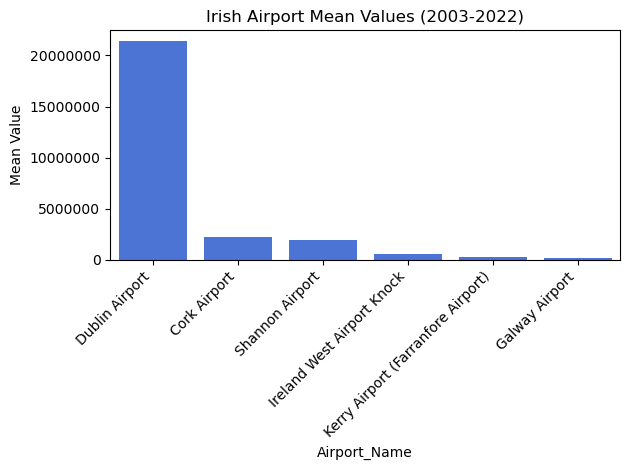

In [122]:
# Assuming df is your DataFrame

sns.barplot(x='Airport_Name', y='mean', data=ireland_airports,color='#346beb')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Airport_Name')
plt.ylabel('Mean Value')

# Turn off scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.title('Irish Airport Mean Values (2003-2022)')
plt.tight_layout()
plt.show()

Now we can perform `Anova one-way` and when normality tests are not successful we can use this dataset also for `Kruskal-Wallis`.

●	**Taking into consideration the tasks required in the machine learning section, use appropriate data cleaning, engineering, extraction and/or other techniques to structure and enrich your data. Rationalize your decisions and implementation, including evidence of how your process has addressed the problems identified in the EDA (Exploratory Data Analysis) stage and how your structured data will assist in the analysis stage.<br> This should include visualizations to illustrate your work and evidence to support your methodology.** [0-30]<br>
## Answer

●	**Modern Transport planning has a great dependence on technology and relies upon visualizations to communicate information, this includes web based, mobile based and many other digital transmission formats. Develop an interactive dashboard tailored to modern Transport planning, using tufts principles, to showcase the information/evidence gathered following your Machine Learning Analysis. Detail the rationale for approach and visualisation choices made during development.<br> *Note you may not use Powerbi, rapidminer, tableau or other such tools to accomplish this (at this stage).*** [0-30]<br>
## Answer